#Deep Learning Classification of Iris Dataset Using Feed Forward Neural Network

Load the Iris Dataset

In [1]:
import pandas as pd   # import the pandas library for data exploration
from sklearn.datasets import load_iris    # load the iris dataset from the Sci kit learn library

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Data Setup

In [2]:
# Normalise the data
from sklearn.preprocessing import normalize
df_norm = normalize(df)
df_norm[:10]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451]])

In [3]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_norm, data.target, random_state=0)  # random_state controls the shuffling applied to the data before the split

In [4]:
# one hot encode the training data
from tensorflow.keras import utils
y_train_cat = utils.to_categorical(y_train)

# one hot encode the test data
y_test_cat = utils.to_categorical(y_test)

y_train_cat[:10]
y_test_cat[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

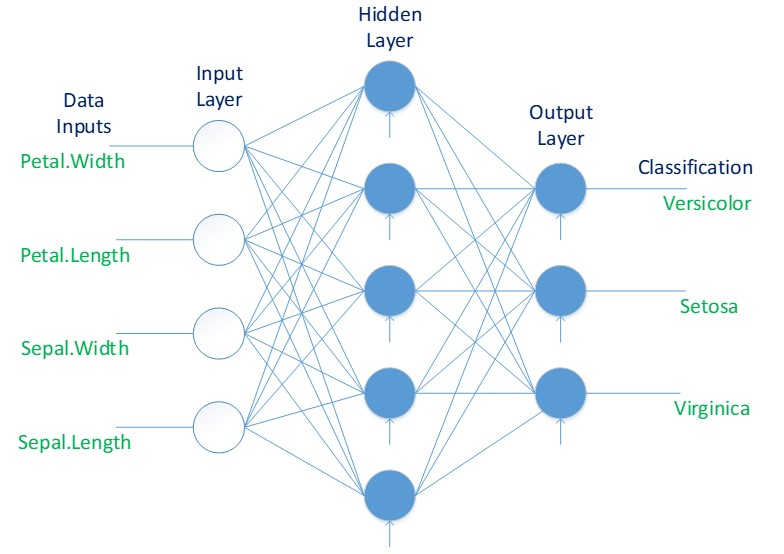

Create the model

In [5]:
# Create the neural network (replace the question marks)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()  # creates an empty model we can add layers to
model.add(Dense(units=5, input_dim=4, activation='relu'))  # input layer and first layer combined
model.add(Dense(units=3, activation='softmax'))   # output layer

How many trainable parameters does this network have?

In [6]:
# Use model.summary() to view the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model

In [7]:
# 1. Compile the model (replace the question marks)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Fit Model with Training Data Set

In [8]:
# Fit the model
history = model.fit(
    x_train,    # input training data
    y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(x_test, y_test_cat))  # input test data, output test data

Epoch 1/125
12/12 [==============================] - 7s 180ms/step - loss: 1.0963 - accuracy: 0.5625 - val_loss: 1.1036 - val_accuracy: 0.2895
Epoch 2/125
12/12 [==============================] - 0s 32ms/step - loss: 1.0919 - accuracy: 0.4375 - val_loss: 1.1036 - val_accuracy: 0.2368
Epoch 3/125
12/12 [==============================] - 0s 32ms/step - loss: 1.0886 - accuracy: 0.3661 - val_loss: 1.1033 - val_accuracy: 0.2368
Epoch 4/125
12/12 [==============================] - 0s 11ms/step - loss: 1.0856 - accuracy: 0.3661 - val_loss: 1.1031 - val_accuracy: 0.2368
Epoch 5/125
12/12 [==============================] - 0s 21ms/step - loss: 1.0826 - accuracy: 0.3661 - val_loss: 1.1024 - val_accuracy: 0.2368
Epoch 6/125
12/12 [==============================] - 0s 15ms/step - loss: 1.0800 - accuracy: 0.3661 - val_loss: 1.1013 - val_accuracy: 0.2368
Epoch 7/125
12/12 [==============================] - 0s 8ms/step - loss: 1.0772 - accuracy: 0.3661 - val_loss: 1.0990 - val_accuracy: 0.2368
Epoch 

Exercise 7: Plot and Analyse

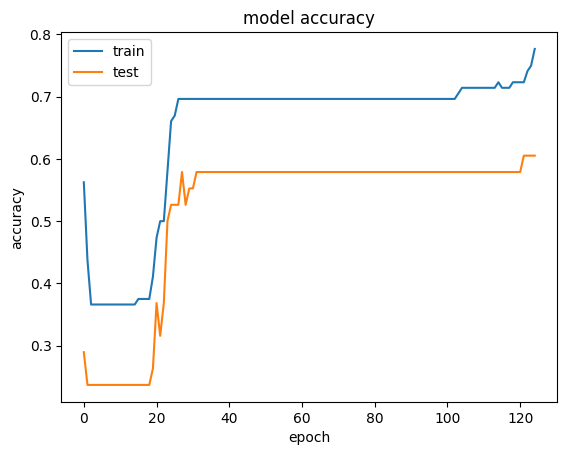

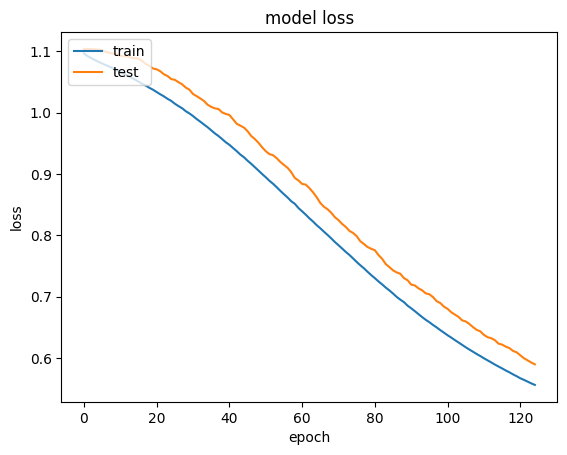

In [9]:
# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Modify the number of units in the hidden layer to 10.
## Observe the effect of this change on the model's accuracy.



Epoch 1/125
12/12 [==============================] - 1s 25ms/step - loss: 1.1776 - accuracy: 0.3036 - val_loss: 1.1383 - val_accuracy: 0.4211
Epoch 2/125
12/12 [==============================] - 0s 6ms/step - loss: 1.1681 - accuracy: 0.3036 - val_loss: 1.1324 - val_accuracy: 0.4211
Epoch 3/125
12/12 [==============================] - 0s 10ms/step - loss: 1.1602 - accuracy: 0.3036 - val_loss: 1.1287 - val_accuracy: 0.4211
Epoch 4/125
12/12 [==============================] - 0s 6ms/step - loss: 1.1529 - accuracy: 0.3036 - val_loss: 1.1267 - val_accuracy: 0.4211
Epoch 5/125
12/12 [==============================] - 0s 6ms/step - loss: 1.1445 - accuracy: 0.3036 - val_loss: 1.1225 - val_accuracy: 0.4211
Epoch 6/125
12/12 [==============================] - 0s 7ms/step - loss: 1.1377 - accuracy: 0.2946 - val_loss: 1.1201 - val_accuracy: 0.4211
Epoch 7/125
12/12 [==============================] - 0s 7ms/step - loss: 1.1313 - accuracy: 0.2768 - val_loss: 1.1173 - val_accuracy: 0.4211
Epoch 8/125

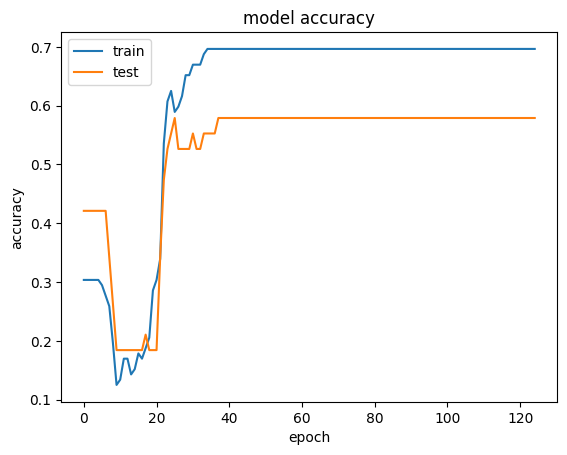

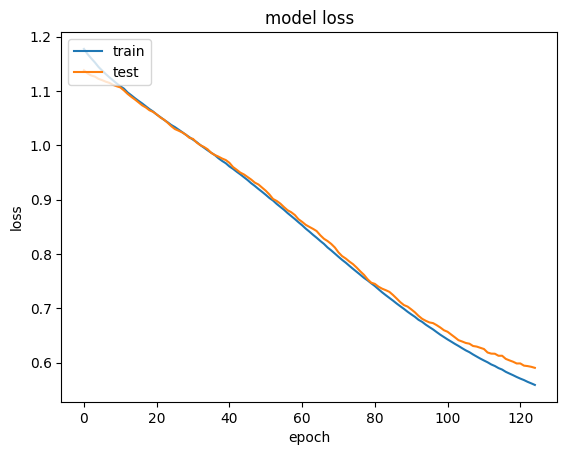

In [10]:
# create the model
model = Sequential()  # creates an empty model we can add layers to
model.add(Dense(units=10, input_dim=4, activation='relu'))  # input layer and first layer combined
model.add(Dense(units=3, activation='softmax'))   # output layer

# fit the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(
    x_train,    # input training data
    y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(x_test, y_test_cat))  # input test data, output test data

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Transform the neural network into a deep neural network by adding an additional hidden layer.
##Evaluate the impact of this change on the model's accuracy.

Epoch 1/125
12/12 [==============================] - 1s 25ms/step - loss: 1.0639 - accuracy: 0.3304 - val_loss: 1.0613 - val_accuracy: 0.3421
Epoch 2/125
12/12 [==============================] - 0s 6ms/step - loss: 1.0563 - accuracy: 0.4107 - val_loss: 1.0546 - val_accuracy: 0.5263
Epoch 3/125
12/12 [==============================] - 0s 6ms/step - loss: 1.0496 - accuracy: 0.6786 - val_loss: 1.0505 - val_accuracy: 0.5789
Epoch 4/125
12/12 [==============================] - 0s 7ms/step - loss: 1.0436 - accuracy: 0.6964 - val_loss: 1.0456 - val_accuracy: 0.5789
Epoch 5/125
12/12 [==============================] - 0s 5ms/step - loss: 1.0362 - accuracy: 0.6964 - val_loss: 1.0394 - val_accuracy: 0.5789
Epoch 6/125
12/12 [==============================] - 0s 6ms/step - loss: 1.0290 - accuracy: 0.6964 - val_loss: 1.0334 - val_accuracy: 0.5789
Epoch 7/125
12/12 [==============================] - 0s 6ms/step - loss: 1.0228 - accuracy: 0.6964 - val_loss: 1.0261 - val_accuracy: 0.5789
Epoch 8/125


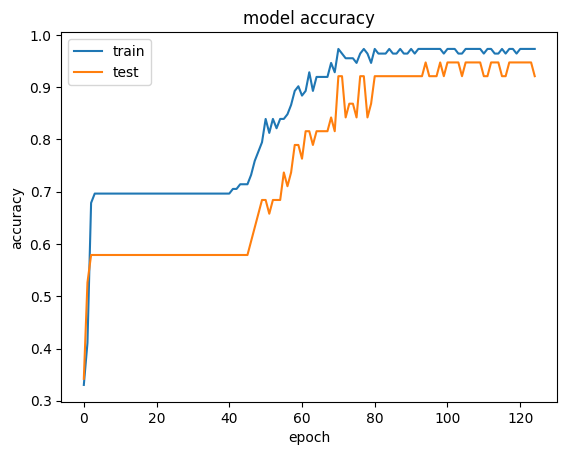

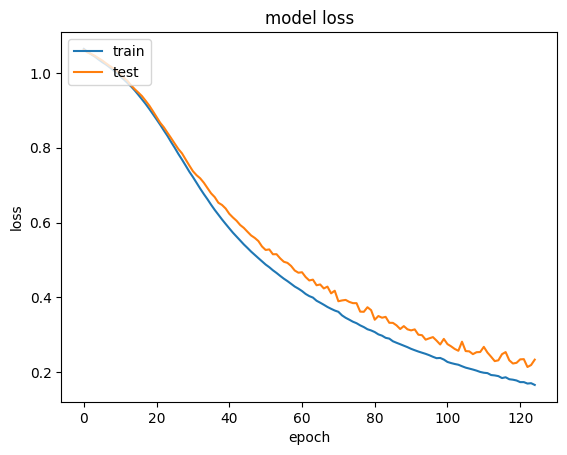

In [11]:
# create the model
model = Sequential()  # creates an empty model we can add layers to
model.add(Dense(units=10, input_dim=4, activation='relu'))  # input layer and first layer combined
model.add(Dense(units=10, activation='relu'))  # another hidden layer
model.add(Dense(units=3, activation='softmax'))   # output layer

# fit the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model (replace the question marks)
history = model.fit(
    x_train,    # input training data
    y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(x_test, y_test_cat))  # input test data, output test data

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()